## Replicating <a href="https://ieeexplore.ieee.org/abstract/document/1407871">w-kMeans</a> as proposed in this paper

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Dummy data

In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
df.head()

,x,y,target
0,0.89,6.35,1
1,5.79,12.47,3
2,5.43,11.14,3
3,5.75,2.20,1
4,9.15,0.14,2


In [ ]:
# X = df.drop("target", axis=1)
X = df.drop("target", axis=1)
y = df["target"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1500 non-null   float64
 1   y       1500 non-null   float64
 2   target  1500 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 35.3 KB


In [ ]:
df.shape

(1500, 3)

In [ ]:
df.head()

,x,y,target
0,0.89,6.35,1
1,5.79,12.47,3
2,5.43,11.14,3
3,5.75,2.20,1
4,9.15,0.14,2


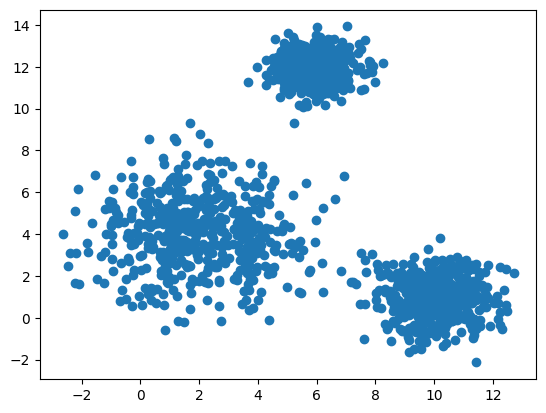

In [ ]:
plt.scatter(df["x"], df["y"])

# Splitting the data into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7) # 80-20 split

In [ ]:
X_train

,x,y
691,7.00,11.39
652,2.58,4.48
672,10.72,-0.02
199,5.68,12.55
1435,9.94,1.81
...,...,...
211,6.88,11.40
502,6.24,12.06
537,9.71,1.27
1220,12.17,-0.08


In [ ]:
y_test

547     3
984     2
712     2
638     3
471     1
       ..
1499    3
518     2
213     1
1430    2
500     1
Name: target, Length: 300, dtype: int64

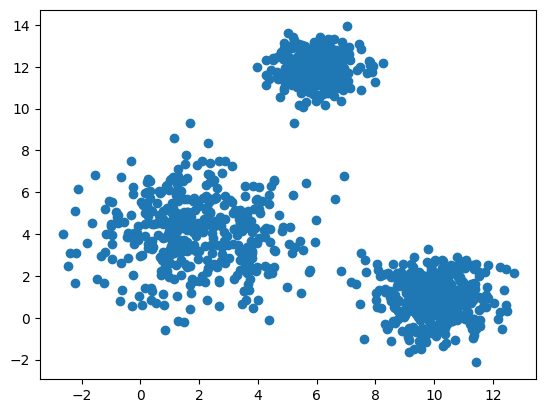

In [ ]:
plt.scatter(X_train["x"], X_train["y"])

# Training the data on a standard kmeans

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=7) # Ideally we'll use elbow method for finding K

kmeans.fit(X_train)

KMeans(n_clusters=3, random_state=7)

## Playing around to try and implement parts of the weighted K-means algo
### Testing out distance functions

In [ ]:
def euclidean_dist_row(c1, c2):
    sum_square = 0.0
    c1 = c1.to_numpy()[0]
    c2 = c2.to_numpy()[0]
    for coord in zip(c1, c2):
        sum_square += (float(coord[0]) - float(coord[1]))**2
    return math.sqrt(sum_square)

In [ ]:
def euclidean_dist(p1, p2):
    return math.sqrt((p1-p2)**2)

In [ ]:
def linear_dist(p1, p2):
    return p1-p2

In [ ]:
w = [1]*X.shape[1]
w = [0.5, 0.5]

In [ ]:
beta = 2

In [ ]:
def distance_function(p1, p2):
    p1 = p1.to_numpy()[0]
    p2 = p2.to_numpy()[0]
    sum = 0.0
    i = 0
    for coord in zip(p1, p2):
        sum += ((w[i]**beta)*linear_dist(coord[0],coord[1]))**2
        i += 1
    return math.sqrt(sum)

In [ ]:
# Weighted euclidean distance from one point to another point
for i in range(df.shape[0]):
    print(distance_function(X.iloc[[i]], X.iloc[[0]]))
    print(distance_function(X.iloc[[i]], X.iloc[[1]]))
    print(distance_function(X.iloc[[i]], X.iloc[[2]]))

0.0
1.959980867253556
1.6499185585961509
1.959980867253556
0.0
0.3444651651473629
1.6499185585961509
0.3444651651473629
0.0
1.5976956061778478
2.567519474122835
2.236431309027845
2.583501741822521
3.19490316754671
2.9029984498790213
2.744659587271252
3.1280754866211273
2.8591803895522228
1.8137599069336605
0.24515301344262547
0.16779824194549833
2.5941340077181825
2.930295420260558
2.6621631242281154
2.6201192720943065
2.9852721818956476
2.715139268987873
2.692667125732403
3.1447466114140266
2.868435984992519
0.8977819891265363
2.7292879107928503
2.393497702108778
1.9526600446570317
0.02015564437074644
0.3304920573932148
2.3284785805327908
2.951315384705606
2.6534234961649075
2.584511559269952
3.0343244717729188
2.755817709863989
1.892465323328277
0.16552945357246884
0.24270609798684484
1.5708059237219603
0.3991631871803812
0.09519716382329887
2.9017774725157683
2.915512390644224
2.689536437752796
1.8356095717771796
0.2010286049297465
0.18569127604709917
1.090197803153171
2.49872592534

2.7376084453405682
2.4496951340932203
1.9959020517049428
0.036055512754639744
0.37882218784015265
2.042134300186939
0.1089151045539597
0.40187840200737307
0.6117648649603865
1.349872679181263
1.0482425768876211
1.859855505140117
0.2103865489996927
0.2112610943832299
1.8932990387152264
0.21396553460779613
0.24650050709886986
2.1591925574158504
2.6697307916717
2.3756643807575175
2.4511795629859514
2.93443457074783
2.6500000000000004
2.0475137362176596
0.1125277743492688
0.4535209476970164
0.5513449464718071
2.1813771452914783
1.8425254408012934
1.7222441754873203
0.2538700454957223
0.23373328817265185
0.21801662780622935
2.060796266009816
1.7365087100271048
0.8078443538207096
2.1529543655173
1.808633807601749
0.3046001477346983
2.2274438825703333
1.9285810846319116
1.791314112600021
0.4480862082233731
0.27681221071332834
2.427947950430569
2.8216938618496514
2.5440764532537146
2.5854230794978217
3.014102270992144
2.7374543375187104
0.34792240514229605
1.8041687836785119
1.472381149702753


2.2274214352025976
1.8992926314815208
0.6695194171941542
2.4328853754338695
2.095882868864575
2.454508606625774
3.0880920484985546
2.792003089181672
0.7186141175902404
2.2153569125538213
1.8724349120863988
0.8413567911415465
2.085457084190418
1.7409946869534094
2.1381081006347644
0.1835245215223295
0.5265216044950103
1.6923448968812478
0.2690376367722554
0.12191185340236597
0.9555692020989374
2.6931046210646925
2.3526806519372747
1.9958159359019059
0.21571103356110463
0.3486581420245337
2.0276587484091104
0.1588238017426856
0.4727380352795824
1.7129287784376794
0.3820994634908561
0.41189349351501053
2.600781132659955
3.042410639608007
2.7649875677839857
2.7781299915590703
2.9471479857652216
2.700412005602108
0.8067101400131275
2.5442692958883106
2.204954648059683
2.2555833502666225
0.5388471490135214
0.6563630854946064
1.8494593804677086
0.3511765937530576
0.2559907224881403
2.542588494035163
2.8457874569264656
2.5793046543593876
2.211619881444368
0.2894175184746077
0.5624111040866813


2.3127432304516646
1.9744936059658438
2.044529285679225
0.17951323071016248
0.39469133509617366
1.960640839113579
2.7111736388508945
2.397140223266048
2.0919383953644526
0.16249999999999998
0.44722757070645824
2.4190041856102686
3.0676996675033235
2.769794667479884
1.2112106546757255
2.912281107654273
2.569623026827087
1.0048445153355816
2.3314936199784038
1.9872043805305986
2.0117312196215478
0.23165167817220755
0.36600034152989513
2.6926578412416236
3.3870165706710087
3.0904773094135476
0.3718366576872161
2.014264754196925
1.6802771348798387
1.092511441587684
2.8966197972809615
2.558065675466523
1.4481237861453693
3.3426804364162606
3.0094278941353623
2.7019668761848283
3.113880216064838
2.8413960037277453
1.9335104085574508
0.32574913660668403
0.32040014044940746
1.2610932756937527
3.026360231367046
2.6853514667543985
1.8914445537736497
0.08284020762890448
0.26326080224750514
0.5209246586599638
2.319043445043667
1.9855304706803167
2.6012016453939126
2.8010578358898623
2.546125733344

2.573450990401799
2.2852420550129913
2.3264739951265305
2.7782019814981056
2.4931155207891993
2.0230252717156056
0.06823672031978083
0.3946200704475127
2.134563772764824
0.21403854793003987
0.4865503571060244
2.746121128064092
3.152016219818674
2.8810588331375677
1.7376151041010206
0.27920646482486766
0.30864623762488985
0.4146383966783588
2.1226516435816785
1.788387891370326
0.06249999999999983
1.9965360627847424
1.6822938209480531
0.5939960016700448
1.8589731708661101
1.5167440456451444
0.39374007924009985
1.5806189452236743
1.283160161476345
2.6609443812300926
2.947829710142701
2.686076367119893
3.043544397573329
3.415986314375396
3.1543234219084133
2.0380198723270584
0.09513148795220198
0.4379283617214119
0.23351927115336737
2.1840000572344316
1.868321439153338
2.2843926982898544
2.7947495415510852
2.504057956597651
0.4471087675275447
1.8730072744119284
1.5354518878818704
2.680123597896187
2.990587316899475
2.727064584860432
2.5822131980144474
3.0898624564857253
2.806382235191778
0

In [ ]:
# Normal euclidean distance from one point to another point
for i in range(df.shape[0]):
    print(euclidean_dist_row(X.iloc[[i]], X.iloc[[3]]))

6.390782424711391
10.27007789649134
8.94572523611138
0.0
3.975374196223546
4.828436599977264
9.313092934143842
4.395383942273985
4.426341604530767
4.543566880766695
4.981576055828115
10.200313720665653
3.00847137264093
4.159867786360524
9.675293277208706
8.876857552084523
6.097384685256459
9.48190381727214
2.437580767892625
4.889713693049932
4.8647404863980155
10.574313216469426
5.062529012262547
9.93
7.881370439206623
2.6496980960101846
9.08081494140256
10.849336385235734
10.692922893203711
1.4848568954616466
3.8806185074031694
4.801499765698214
5.926634795564849
4.195473751556551
1.4552319402761882
8.859492084764229
5.33603785593768
5.817508057579293
9.581690873744568
6.263960408559428
5.174794681917342
1.2396773773849386
4.302766551882637
5.2158412552530775
2.252198925494815
4.704944207958262
4.959808464043747
4.6797008451395685
5.954771196276144
9.56077925694344
6.1701944863999225
4.59190592238125
6.917781436269868
4.320231475279999
1.986554806694243
5.289810960705497
9.52042541066

5.774400401773331
10.037773657539804
9.897009649383998
5.335100748814403
9.017344398435716
10.734099869108727
3.0001499962501876
4.1292130000764065
9.713397963637647
8.612345789620852
4.970975759345442
4.2196919318831805
10.150788146740135
9.620005197503795
5.335400641001573
9.58466483503727
9.818034426503097
2.138597671372528
10.821039691268117
3.6136546597592853
4.934906280771703
4.3809816251611915
4.363542139134215
3.416460156360674
9.256835312351626
4.118507011041744
5.5070591062744185
4.25376303994475
11.223978795418317
4.494808116037881
2.4332899539512343
8.886039612785888
5.948461986093549
3.0662354769325857
4.622607489285673
5.165626777071684
9.21744541616602
9.057091144512128
5.028021479667724
9.885848471426213
5.440450349006045
9.555249865911408
4.5475707800978755
9.830208543057466
5.688602640367844
8.731093860450704
1.5037619492459569
5.40270302718926
4.535956348996317
9.400430841190204
3.6754455512223276
9.12612184884686
2.7305860176892436
5.0670010854547884
3.0685827347490

4.642467016576424
10.52555461721614
6.170291727301069
4.195056614635851
10.340696301506973
4.150614412349092
2.913417237540823
4.875120511330977
11.141709922628573
9.545705840848019
1.2706297651164948
5.5946492293976755
3.761927697338161
9.595009119328651
3.7136101033899616
9.687378386333423
10.368268900833927
4.981284974783113
10.380390166077573
4.3422574773958305
4.713491275052919
8.544267083840486
10.203572903645075
7.599611832192483
10.564624934184838
5.140204276096426
10.340686630973785
8.97008918573277
2.4988397307550563
5.455364332471297
2.826817999093681
4.6531709618280725
6.1335960088678805
4.791043727623449
6.774813650573719
7.178669793213782
4.5232842050881565
9.223730264919936
9.548717191329944
10.132388662107271
3.804024184991468
9.643982579826657
5.292730864119202
4.87345873071682
10.339753381971933
3.3963804262773625
3.1085848870506987
5.445677184703477
10.707474025184464
9.139655354552488
1.0536128321162381
4.016167327191436
6.246791176276026
3.4901289374462947
4.654137

In [ ]:
def getDj(j):
    Dj = 0
    for m in range(k):
        for n in range(X_train.shape[0]):
            Dj += u[n][m]*((X_train.iloc[[n]].to_numpy()[0])[j] - z[m][0][j])**2
#     Dj = math.sqrt(Dj)
    return Dj

# Defining the variables

In [ ]:
k = 3

### <i>If an ith point belongs to lth cluster</i>

In [ ]:
u = [[0]*k]*X_train.shape[0]
u = np.array(u, dtype='float64')
u

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

### Initial centroids

In [ ]:
z = []
for i in range(k):
    z.append(X_train.iloc[[i]].to_numpy())
# z.append(X_train.iloc[[0]].to_numpy())
# z.append(X_train.iloc[[5]].to_numpy())
z = np.array(z, dtype='float64')
z

array([[[ 7.  , 11.39]],

       [[ 2.58,  4.48]],

       [[10.72, -0.02]]])

### Initializing weights

In [ ]:
w = [1.0/X_train.shape[1]]*X_train.shape[1]
w = np.array(w, dtype='float64')
w

array([0.5, 0.5])

### Running weighted kmeans

In [ ]:
# X_train = pd.read_csv("./test.csv")
# X_train

In [ ]:
MAX_ITER = 10000

In [ ]:
cur_u = u
prev_u = np.array([])
cur_z = z
prev_z = np.array([])
cur_w = w
prev_w = np.array([])

In [ ]:
cur_u = u
prev_u = np.array([])
cur_z = z
prev_z = np.array([])
cur_w = w
prev_w = np.array([])

while True:
    print(w)
    # Update the data points' clusters
    a = 0
    for i in range(X_train.shape[0]):
        distances = []
        for j in range(k):
            distances.append(distance_function(X_train.iloc[[i]], pd.DataFrame(z[j])))
        min_cluster = np.argmin(distances)
        for j in range(k):
            if(j == min_cluster):
                u[i][j] = 1
            else:
                u[i][j] = 0

    # Convergence
    if np.array_equal(u, prev_u):
        print("Convergence by datapoints")
        break
    else:
        prev_u = u

    # Update the centroids
    for i in range(k):
        z[i] = np.array([0]*X_train.shape[1])
        n = 0
        for j in range(X_train.shape[0]):
            if(u[j][i] == 1):
                    z[i] += X_train.iloc[[j]].to_numpy()[0]
                    n += 1
        if n == 0:
            n = 1
        z[i] = np.divide(z[i], n)

    # Convergence
    if np.array_equal(z, prev_z):
        print("Convergence by centroids")
        break
    else:
        prev_z = z


    # Update the weights
    if(beta == 1):
        j_min = float('inf')
        j_min_index = 0
        for j in range(len(w)):
            Dj = getDj(j)
            if(Dj < j_min):
                j_min = Dj
                j_min_index = j
        for j in range(len(w)):
            w[j] = 0
        w[j_min_index] = 1
    else:
        for j in range(len(w)):
            Dj = getDj(j)
            if Dj == 0:
                w[j] = 0
            else:
                denom = 0
                for j1 in range(X_train.shape[1]):
                    Dt = getDj(j1)
                    if(Dt != 0):
                        denom += (Dj/Dt)**(1/(beta - 1))
                w[j] = 1.0/denom

    # Convergence
    if np.array_equal(w, prev_w):
        print("Convergence by weights")
        break
    else:
        prev_w = w

    a += 1

    # Max iterations reached?
    if a >= MAX_ITER:
        break
#     break

[0.5 0.5]
[0.49685447 0.50314553]
Convergence by datapoints


# Displaying the weights

In [ ]:
w

array([0.49685447, 0.50314553])

In [ ]:
class wKmeans:

    def __init__(self, k, beta = 2, max_iter=10000):
        self.k = k
        self.beta = beta
        self.MAX_ITER = max_iter

        self.u = [[0]*k]*X_train.shape[0]
        self.u = np.array(self.u, dtype='float64')

        self.z = []
        for i in range(k):
            self.z.append(X_train.iloc[[i]].to_numpy())
        self.z = np.array(self.z, dtype='float64')

        self.w = [1.0/X_train.shape[1]]*X_train.shape[1]
        self.w = np.array(self.w, dtype='float64')

        self.prev_u = np.array([])
        self.prev_z = np.array([])
        self.prev_w = np.array([])

    def linear_dist(self, p1, p2):
        return p1-p2

    def distance_function(self, p1, p2):
        p1 = p1.to_numpy()[0]
        p2 = p2.to_numpy()[0]
        sum = 0.0
        i = 0
        for coord in zip(p1, p2):
            sum += ((self.w[i]**beta)*self.linear_dist(coord[0],coord[1]))**2
            i += 1
        return math.sqrt(sum)

    def getDj(j):
        Dj = 0
        for m in range(k):
            for n in range(X_train.shape[0]):
                Dj += u[n][m]*((X_train.iloc[[n]].to_numpy()[0])[j] - z[m][0][j])**2
        return Dj

    def fit(self, X_train):

        while True:
            a = 0
            for i in range(X_train.shape[0]):
                distances = []
                for j in range(self.k):
                    distances.append(self.distance_function(X_train.iloc[[i]], pd.DataFrame(self.z[j])))
                min_cluster = np.argmin(distances)
                for j in range(self.k):
                    if(j == min_cluster):
                        self.u[i][j] = 1
                    else:
                        self.u[i][j] = 0

            # Convergence
            if np.array_equal(self.u, self.prev_u):
                print("Convergence by datapoints")
                break
            else:
                self.prev_u = self.u

            # Update the centroids
            for i in range(self.k):
                self.z[i] = np.array([0]*X_train.shape[1])
                n = 0
                for j in range(X_train.shape[0]):
                    if(self.u[j][i] == 1):
                            self.z[i] += X_train.iloc[[j]].to_numpy()[0]
                            n += 1
                if n == 0:
                    n = 1
                self.z[i] = np.divide(self.z[i], n)

            # Convergence
            if np.array_equal(self.z, self.prev_z):
                print("Convergence by centroids")
                break
            else:
                self.prev_z = self.z


            # Update the weights
            if(self.beta == 1):
                j_min = float('inf')
                j_min_index = 0
                for j in range(len(self.w)):
                    Dj = getDj(j)
                    if(Dj < j_min):
                        j_min = Dj
                        j_min_index = j
                for j in range(len(self.w)):
                    self.w[j] = 0
                self.w[j_min_index] = 1
            else:
                for j in range(len(self.w)):
                    Dj = getDj(j)
                    if Dj == 0:
                        self.w[j] = 0
                    else:
                        denom = 0
                        for j1 in range(X_train.shape[1]):
                            Dt = getDj(j1)
                            if(Dt != 0):
                                denom += (Dj/Dt)**(1/(self.beta - 1))
                        self.w[j] = 1.0/denom

            # Convergence
            if np.array_equal(self.w, self.prev_w):
                print("Convergence by weights")
                break
            else:
                self.prev_w = self.w

            a += 1

            # Max iterations reached?
            if a >= self.MAX_ITER:
                print("MAX_ITER reached")
                break

    def getWeights(self):
        return self.w

## Review-3

In [ ]:
wkm = wKmeans(k=3, beta=3)

In [ ]:
wkm.fit(X_train)

Convergence by datapoints
Took 2 iterations to converge


In [ ]:
wkm.getWeights()

array([0.49842722, 0.50157278])

In [ ]:
X_train

,x,y
691,7.00,11.39
652,2.58,4.48
672,10.72,-0.02
199,5.68,12.55
1435,9.94,1.81
...,...,...
211,6.88,11.40
502,6.24,12.06
537,9.71,1.27
1220,12.17,-0.08


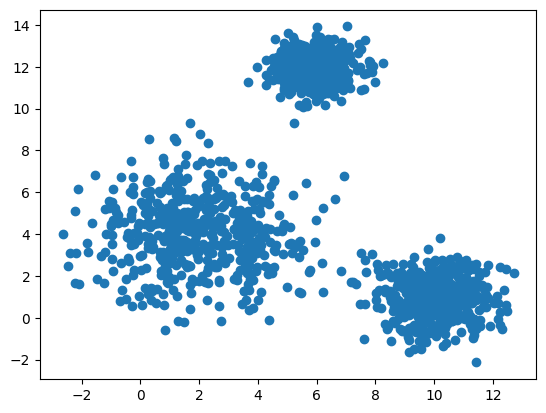

In [ ]:
plt.scatter(X["x"], X["y"])

In [ ]:
X

,x,y
0,0.89,6.35
1,5.79,12.47
2,5.43,11.14
3,5.75,2.20
4,9.15,0.14
...,...,...
1495,6.36,12.84
1496,4.90,12.38
1497,5.66,11.02
1498,5.58,11.36


In [ ]:
np.random.randint(12, size=1500)

array([6, 4, 3, ..., 9, 3, 8])

In [ ]:
df["noise"] = np.random.randint(12, size=1500)

In [ ]:
df

,x,y,target,noise
0,0.89,6.35,1,11
1,5.79,12.47,3,10
2,5.43,11.14,3,2
3,5.75,2.20,1,1
4,9.15,0.14,2,2
...,...,...,...,...
1495,6.36,12.84,3,9
1496,4.90,12.38,3,10
1497,5.66,11.02,3,6
1498,5.58,11.36,3,4


In [ ]:
X = df.drop(columns=["target"])
y = df["target"]

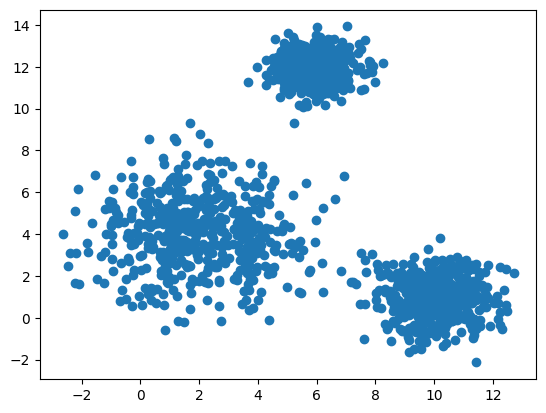

In [ ]:
plt.scatter(X["x"], X["y"])

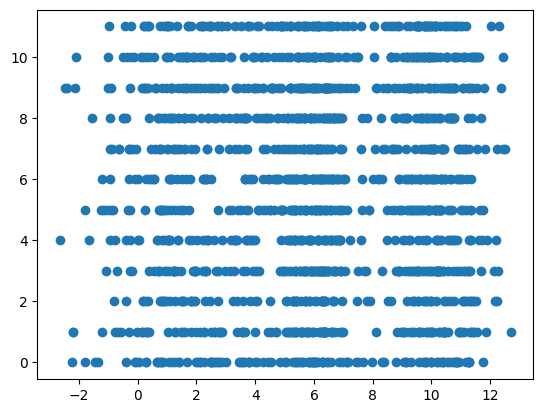

In [ ]:
plt.scatter(X["x"], X["noise"])

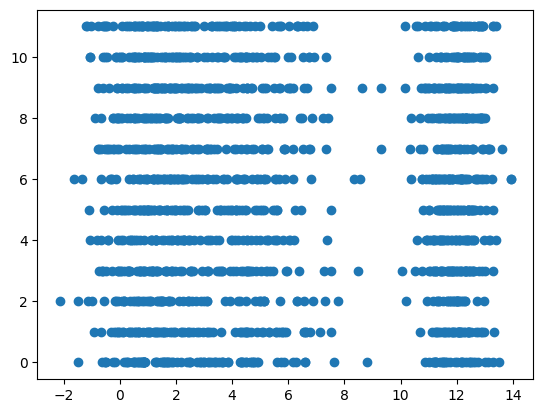

In [ ]:
plt.scatter(X["y"], X["noise"])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7) # 80-20 split

In [ ]:
X_train

,x,y,noise
691,7.00,11.39,5
652,2.58,4.48,8
672,10.72,-0.02,3
199,5.68,12.55,5
1435,9.94,1.81,3
...,...,...,...
211,6.88,11.40,4
502,6.24,12.06,2
537,9.71,1.27,4
1220,12.17,-0.08,2


In [ ]:
wkm = wKmeans(k=3)

In [ ]:
wkm.fit(X_train)

Convergence by datapoints
Took 2 iterations to converge


In [ ]:
wkm.getWeights()

array([0.37269405, 0.55502754, 0.07227841])

#### From the above weights, we can see that column-3(which is "noise") is very insignificant as per the weights we get. Therefore we have to drop that column to get better accuracy

### Adding p-value based weight initialization

In [ ]:
import statsmodels.api as sm
numVars = X_train.shape[1]

p_val = []

for i in range(0, numVars):
    regressor_OLS = sm.OLS(y_train, X_train).fit()
    p_val.append([regressor_OLS.pvalues[i]])

print(p_val)

[[0.0], [0.0], [9.71343879442151e-07]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
minmax = MinMaxScaler()
p_val_scaled = minmax.fit(p_val)
p_val_scaled = minmax.transform(p_val).tolist()
p_val_scaled

[[0.0], [0.0], [1.0]]

In [ ]:
# Taking reciprocal
p_val_weights = []
total = 0
for i in p_val_scaled:
    i = i[0]
    if i == 0:
        i = 0.1

    p_val_weights.append(1/i)
    total += 1/i

p_val_weights = np.array(p_val_weights)
p_val_weights

array([10., 10.,  1.])

In [ ]:
total

21.0

In [ ]:
p_val_weights = p_val_weights/total
p_val_weights

array([0.47619048, 0.47619048, 0.04761905])

## Implementing wKmeans with p-value based weights initialization

In [ ]:
class wKmeans:

    def __init__(self, k, beta = 2, max_iter=10000, weight_init='equal'):
        self.k = k
        self.beta = beta
        self.MAX_ITER = max_iter

        self.u = [[0]*k]*X_train.shape[0]
        self.u = np.array(self.u, dtype='float64')

        self.z = []
        for i in range(k):
            self.z.append(X_train.iloc[[i]].to_numpy())
        self.z = np.array(self.z, dtype='float64')

        self.w = [1.0/X_train.shape[1]]*X_train.shape[1]
        self.w = np.array(self.w, dtype='float64')

        self.weight_init = weight_init

        self.prev_u = np.array([])
        self.prev_z = np.array([])
        self.prev_w = np.array([])

    def linear_dist(self, p1, p2):
        return p1-p2

    def distance_function(self, p1, p2):
        p1 = p1.to_numpy()[0]
        p2 = p2.to_numpy()[0]
        sum = 0.0
        i = 0
        for coord in zip(p1, p2):
            sum += ((self.w[i]**self.beta)*linear_dist(coord[0],coord[1]))**2
            i += 1
        return math.sqrt(sum)

    def getDj(self, j):
        Dj = 0
        for m in range(self.k):
            for n in range(X_train.shape[0]):
                Dj += self.u[n][m]*((X_train.iloc[[n]].to_numpy()[0])[j] - self.z[m][0][j])**2
        return Dj

    def init_weight(self, X):
        import statsmodels.api as sm
        from sklearn.preprocessing import MinMaxScaler
        numVars = X_train.shape[1]

        p_val = []

        for i in range(0, numVars):
            regressor_OLS = sm.OLS(y_train, X_train).fit()
            p_val.append([regressor_OLS.pvalues[i]])

        minmax = MinMaxScaler()
        p_val_scaled = minmax.fit(p_val)
        p_val_scaled = minmax.transform(p_val).tolist()

        # Taking reciprocal
        p_val_weights = []
        total = 0
        for i in p_val_scaled:
            i = i[0]
            if i == 0:
                i = 0.1

            p_val_weights.append(1/i)
            total += 1/i

        p_val_weights = np.array(p_val_weights)
        p_val_weights = p_val_weights/total
        self.w = p_val_weights


    def fit(self, X_train):

        if(self.weight_init == 'p-value'):
            self.init_weight(X_train)

        a = 0
        while True:
            a = a + 1
            for i in range(X_train.shape[0]):
                distances = []
                for j in range(self.k):
                    distances.append(self.distance_function(X_train.iloc[[i]], pd.DataFrame(self.z[j])))
                min_cluster = np.argmin(distances)
                for j in range(self.k):
                    if(j == min_cluster):
                        self.u[i][j] = 1
                    else:
                        self.u[i][j] = 0

            # Convergence
            if np.array_equal(self.u, self.prev_u):
                print("Convergence by datapoints")
                break
            else:
                self.prev_u = self.u

            # Update the centroids
            for i in range(self.k):
                self.z[i] = np.array([0]*X_train.shape[1])
                n = 0
                for j in range(X_train.shape[0]):
                    if(self.u[j][i] == 1):
                            self.z[i] += X_train.iloc[[j]].to_numpy()[0]
                            n += 1
                if n == 0:
                    n = 1
                self.z[i] = np.divide(self.z[i], n)

            # Convergence
            if np.array_equal(self.z, self.prev_z):
                print("Convergence by centroids")
                break
            else:
                self.prev_z = self.z


            # Update the weights
            if(self.beta == 1):
                j_min = float('inf')
                j_min_index = 0
                for j in range(len(self.w)):
                    Dj = getDj(j)
                    if(Dj < j_min):
                        j_min = Dj
                        j_min_index = j
                for j in range(len(self.w)):
                    self.w[j] = 0
                self.w[j_min_index] = 1
            else:
                for j in range(len(self.w)):
                    Dj = self.getDj(j)
                    if Dj == 0:
                        self.w[j] = 0
                    else:
                        denom = 0
                        for j1 in range(X_train.shape[1]):
                            Dt = self.getDj(j1)
                            if(Dt != 0):
                                denom += (Dj/Dt)**(1/(self.beta - 1))
                        self.w[j] = 1.0/denom

            # Convergence
            if np.array_equal(self.w, self.prev_w):
                print("Convergence by weights")
                break
            else:
                self.prev_w = self.w

            # Max iterations reached?
            if a >= self.MAX_ITER:
                print("MAX_ITER reached")
                break

        print("Took {} iterations to converge".format(a))

    def getWeights(self):
        return self.w

In [ ]:
wkm = wKmeans(k=3, weight_init='p-value')

In [ ]:
wkm.fit(X_train)

Convergence by datapoints
Took 2 iterations to converge


In [ ]:
wkm.getWeights()

array([0.46910957, 0.47504934, 0.0558411 ])

## The algo successsfully detects the noise (3rd column has an extremely low weight of 0.055 compared to others)